# Gym Excercise Dataset Description
The description is taken directly from the owner Niharika Pandit

**Context**

This is a dataset created for analyzing and evaluating workouts that one can do at the gym(or at home) to stay healthy. Exercising and being fit is becoming very important and almost a daily routine for all individuals and what better than to take a data-driven route for success to meet one's fitness goals.

**Inspiration**

If you go to a gym, the first thing you realize is the myriad of exercises available to do. The exercises range from bodyweight, machine-based or dumbbell/barbell based. With so many exercises to do, beginners or even professional can wonder which the exercise that will target a specific muscle the best and that is where this analysis can be useful. I also thought it would be fun to visualize the exercise details.

**Content**

There is one file with 9 columns for each exercise. Columns may contain null values as the data is raw and scraped from various internet sources.

**Attributes for megaGymDataset.csv:**

1.   '#' - ID column (numeric from 0 to 2917)
2.   Title - Title for the excercise (nominal)
3.   Desc - Short description of the excercise (nominal)
4.   Type - Type of excercise (nominal: "Strength", "Stretching", "Cardio", etc.)
5.   BodyPart - BodyPart that it targets (nominal: "Abdominals", "Quadriceps", "Biceps", etc.)
6.   Equipment - Equipment needed for the workout (nominal: "Barbell", "Dumbbell", "Cable", etc.)
7.   Level - Level of excercise (nominal: "Beginner","Intermediate", or "Expert")
8.   Rating - Rating of excercise (numeric: 0 to 10)
9.   RatingDesc - Description for the rating (nominal: "Average)

# 1 - Look at the big picture and frame the problem.

## Frame the problem


1.   Supervised learning - training examples are labeled.
2.   Classification - Predict an excercise.
3.   Batch learning
*   Large data set
*   No continuous flow of data coming into the system
*   No need to adjust to changing data rapidly

## Look at the big picture

Find the best excercises for each category such as type of excercise, targeted body part, available equipment and difficulty of exercise.







In [145]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# 2 - Load the dataset and examine the data structure



In [146]:
url = "https://raw.githubusercontent.com/AndrewHocking/EECS-3401-Final-Project/main/megaGymDataset.csv"
gym = pd.read_csv(url, sep=',')

#Fix ID column name
gym.rename(columns={"Unnamed: 0": "ID"}, inplace = True)

gym_backup = gym

gym.head()

,ID,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


Average rating for all excercises is 5.9. The bottom 25% of excercises are rated 3 or lower. The top 25% of excercises are rated 8.7 or higher.

In [147]:
gym.describe()

,ID,Rating
count,2918.000000,1031.000000
mean,1458.500000,5.919690
std,842.498368,3.584607
min,0.000000,0.000000
25%,729.250000,3.000000
50%,1458.500000,7.900000
75%,2187.750000,8.700000
max,2917.000000,9.600000


**Missing values:**

*   Desc: 1550
*   Rating: 1887
*   RatingDesc: 2056

In [148]:
gym.isnull().sum()

ID               0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

In [149]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2918 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


### Excercise count for each type of excercise

In [150]:
gym['Type'].value_counts()

Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: Type, dtype: int64

### Excercise count for each body part

In [151]:
gym['BodyPart'].value_counts()

Abdominals     662
Quadriceps     646
Shoulders      340
Chest          262
Biceps         168
Triceps        151
Lats           124
Hamstrings     121
Middle Back    118
Lower Back      97
Glutes          81
Calves          47
Forearms        31
Traps           24
Abductors       21
Adductors       17
Neck             8
Name: BodyPart, dtype: int64

### Excercise count for each type of equipment

In [152]:
gym['Equipment'].value_counts()

Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
None               32
E-Z Curl Bar       22
Foam Roll          11
Name: Equipment, dtype: int64

### Excercise count for each level

In [153]:
gym['Level'].value_counts()

Intermediate    2446
Beginner         459
Expert            13
Name: Level, dtype: int64

# 3. Exploratory Data Analysis

There appears to be a large number of excercises with a zero rating which suggests that these excercises are likely not rated correctly.

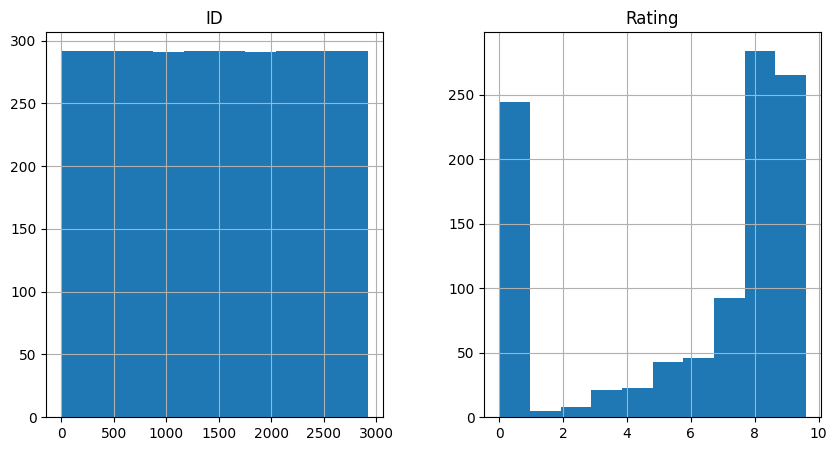

In [154]:
gym.hist(figsize=(10, 5))
plt.show()

### **Distribution of ratings for all excercises**

After excluding excercises with a 0 rating, a large amount of the excercises seem to fall between the 8 to 10 range suggesting that most excercises are effective at targetting their specific muscle groups.

<Axes: xlabel='Rating', ylabel='Count'>

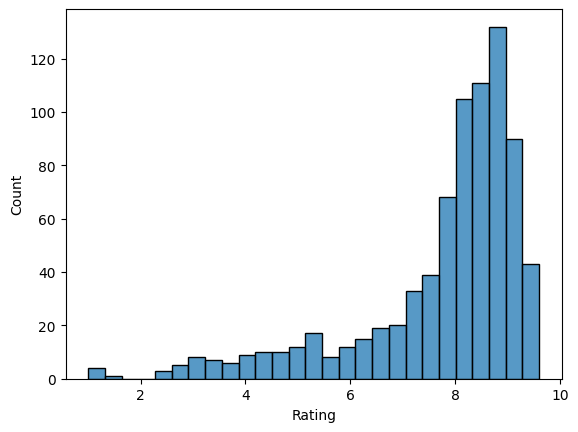

In [155]:
#Create rating distribution excluding all the excercises rated 0
gym_exclude = gym[gym['Rating']!= 0.0]
sns.histplot(gym_exclude, x='Rating')

### **Distribution of excercises for each muscle group.**

Abdominals and Quadriceps have the highest number of excercises followed by the rest of the major muscle groups that are most often targeted.
Unsurprisingly, neck, adductors, abductors, traps and forearms have lowest number of excercises as they are not often trained directly.


In [156]:
#Create distribution of excercises for each muscle group
bodypart_graph = gym_exclude.groupby(['BodyPart']).count().sort_values(by='ID')
px.bar(bodypart_graph, x = bodypart_graph.index, y='ID')

### **Boxplot of excercise rating for each equipment**

This graph shows which types of equipment tend to have excercises of higher ratings. This information, combined with the total number of excercises associated with each type of equipment can be used to determine which equipment make the best investment.

Looking at the data, it appears that dumbbells and barbells are the best equipment to invest in because of their relatively high average excercise ratings and the high number of excercises that require them. Even though the E-Z curl bar has the highest median, it also has the second least number of excercises.

Body only excercises are noteworthy as, even though the average rating is not high, the large amount of excercises combined with the large spread of excercise rating suggest that you can stil get a good workout even as someone with no equipment provided a good selection of excercises.

Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
None               32
E-Z Curl Bar       22
Foam Roll          11
Name: Equipment, dtype: int64

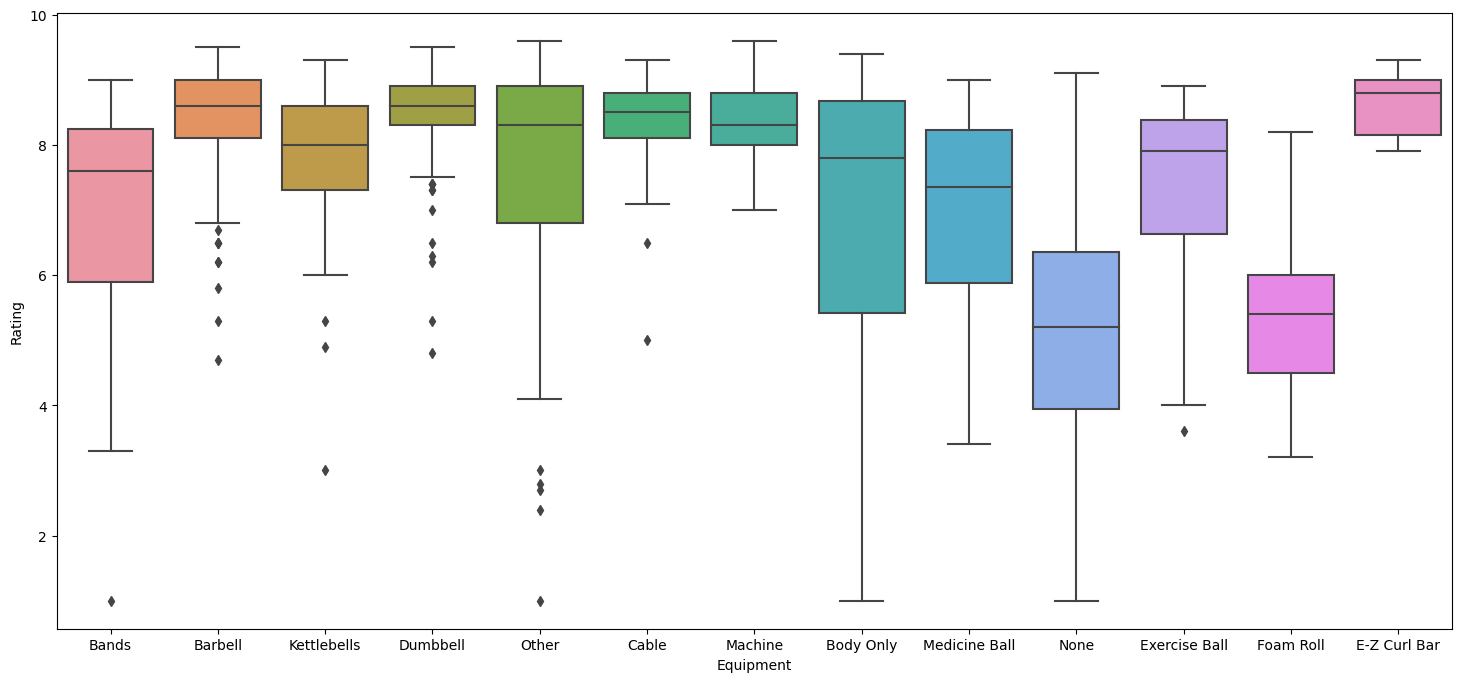

In [157]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Equipment', y='Rating', data=gym_exclude)
gym['Equipment'].value_counts()

### **Distribution of body only excercises for each muscle group**

From this graph, it appears that a majority of body weight excercises target the quadriceps and abdominals. However, there appears to be a decent amount of excercises for most of the other major muscle groups that tend to be targeted directly. However, there appears to be little bodyweight only excercise variety for biceps and calves.

In [158]:
#Create distribution of bodyweight only excercises for each muscle group
bodyonly_graph = gym_exclude[gym_exclude.Equipment == 'Body Only']
bodyonly_graph = bodyonly_graph.groupby(['BodyPart']).count().sort_values(by='ID')
px.bar(bodyonly_graph, x = bodyonly_graph.index, y='ID')

# 4. Prepare the data for Machine Learning Algorithms

There are no duplicate entries

In [159]:
#Check for duplicates
gym.duplicated().sum()

0

There are missing values for Desc, Rating and RatingDesc. However, Desc and RatingDesc are irrelevant for the algorithm so they will be deleted.

In [160]:
#Find the number of missing values in each column

gym.isna().sum()

ID               0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment        0
Level            0
Rating        1887
RatingDesc    2056
dtype: int64

Drop irrelevant columns Desc and RatingDesc

In [161]:
#Drop columns Desc and RatingDesc
gym.drop(labels=['Desc'], axis=1, inplace=True)
gym.drop(labels=['RatingDesc'], axis=1, inplace=True)

gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2918 non-null   int64  
 1   Title      2918 non-null   object 
 2   Type       2918 non-null   object 
 3   BodyPart   2918 non-null   object 
 4   Equipment  2918 non-null   object 
 5   Level      2918 non-null   object 
 6   Rating     1031 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 159.7+ KB


Remove all entries with missing ratings

In [162]:
#Change 0.0 ratings to NaN
gym = gym.replace(0.0,np.nan)

gym.dropna(subset=["Rating"], inplace=True)

gym.isna().sum()

ID           0
Title        0
Type         0
BodyPart     0
Equipment    0
Level        0
Rating       0
dtype: int64

Create pipeline that will scale numerical columns using StandardScaler and encode categorical columns using OneHotEncoder.

In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [164]:
# Create the cat and num columns
# Get a list of column names from the 'students' DataFrame that are of numerical data types.
# Get a list of column names from the 'students' DataFrame that are not of numerical data types.

num_cols = gym.select_dtypes(include='number').columns.to_list()
cat_cols = gym.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("ID")

# Create pipelines for numeric and categorical columns, imputer not used since no empty values.
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                  remainder='passthrough')

In [165]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Rating']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['Title', 'Type', 'BodyPart', 'Equipment',
                                  'Level'])])

In [166]:
gym_prepared = preprocessing.fit_transform(gym)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
gym_prepared = pd.DataFrame(data=gym_prepared, columns=feature_names)



In [167]:
gym_prepared.columns

Index(['num__Rating', 'cat__Title_3/4 sit-up',
       'cat__Title_90-degree jump squat', 'cat__Title_90/90 Hamstring',
       'cat__Title_Ab Crunch Machine', 'cat__Title_Ab Roller',
       'cat__Title_Ab bicycle', 'cat__Title_Adductor SMR',
       'cat__Title_Adductor/Groin', 'cat__Title_Advanced Kettlebell Windmill',
       ...
       'cat__Equipment_Foam Roll', 'cat__Equipment_Kettlebells',
       'cat__Equipment_Machine', 'cat__Equipment_Medicine Ball',
       'cat__Equipment_None', 'cat__Equipment_Other', 'cat__Level_Beginner',
       'cat__Level_Expert', 'cat__Level_Intermediate', 'remainder__ID'],
      dtype='object', length=823)

# 5. Train and evaluate different machine learning algorithms

Since we are predicting a number (ID)we will be using regression models. We will use MSE as a performance metric, because of its simplicity. Linear regression is used as it is simple to intrepret the outcome and fast. A cross-validation model is also used as the error can be averaged over k-folds. For regularization (reduce overfit), a ridge regression model and lasso
 regression model will be used. SVC will also be used.

Split the dataset into a training dataset (80%) and testing dataset.

In [168]:
from sklearn.model_selection import train_test_split


X = gym_prepared.drop(["remainder__ID"], axis=1)
y = gym_prepared["remainder__ID"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(629, 822) (629,) (158, 822) (158,)


Train a Linear Regression Model with no regularization

In [169]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

Test your model on the test set, and report on the Mean Squared Error

In [170]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

5477.428792550335

Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [171]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-4.99115541e+24, -2.95671783e+25, -5.51948840e+25, -4.56512211e+25,
       -2.79301496e+24])

Calculate the mean and standard deviation of the cross-validation scores to get an overall assessment of the model's performance.


In [172]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 2.763949075084932e+25


Train a Linear Regression Model using Ridge and Lasso with alpha=1

In [173]:
from sklearn.linear_model import Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

Test models on test dataset and report on MSE

In [174]:
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Ridge Regression MSE: 6344.535986293813
Lasso Regression MSE: 5632.293388578059


Train SVM Model

In [175]:
#import and train
from sklearn.svm import SVC

model_svm = SVC(kernel='poly', C=0.1, gamma=1)

model_svm.fit(X_train, y_train.values.ravel())

SVR(C=0.1, gamma=1, kernel='poly')

Test on X_Test

In [180]:
#import
from sklearn.metrics import classification_report

#make predictions
y_predict = model_svm.predict(X_test)

svm_mse = mse(y_test, y_predict)

Compare Results of all models:

In [181]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'SVM MSE: {svm_mse}')

Linear Regression MSE: 5477.428792550335
Cross-Validation Mean Score: 2.763949075084932e+25
Ridge Regression MSE: 6344.535986293813
Lasso Regression MSE: 5632.293388578059
SVM MSE: 557641.0844757946


Plot the prediction vs. actual best performing model.

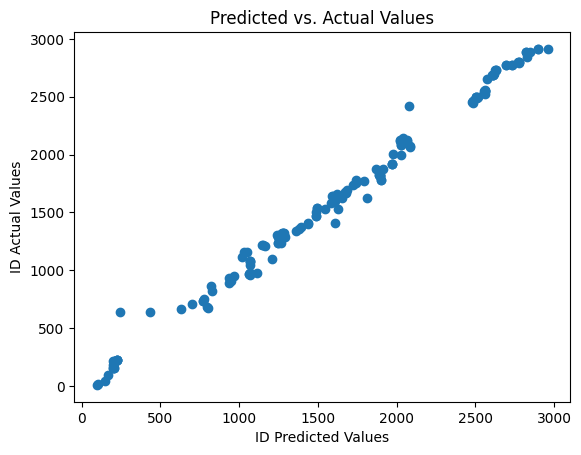

In [142]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained linear regression model
# lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("ID Predicted Values")
plt.ylabel("ID Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()